In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
data_path = "./data/water_pvp/"
all_files = os.listdir(data_path)
csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))
csv_files

['water-PVP_0.csv',
 'water-PVP_1_7.csv',
 'water-PVP_2_7.csv',
 'water-PVP_3_7.csv',
 'water-PVP_4_7.csv',
 'water-PVP_5_7.csv',
 'water-PVP_6_7.csv',
 'water-PVP_7_7.csv']

In [3]:
oil_datas = []
for f_name in csv_files:
    print(f_name)
    viscosity = f_name.split('_')[1].split('.')[0]
    oil_datas.append({
        'v': int(viscosity),  # viscosity
        'fn': f_name.split('.')[0],  # file name
        'df': pd.read_csv(data_path + f_name)  # data frame
    })
print(oil_datas[0]['v'])
oil_datas[3]['df'].tail()
#oil_datas[3]['df'].to_csv("../data/out.csv") 

water-PVP_0.csv
water-PVP_1_7.csv
water-PVP_2_7.csv
water-PVP_3_7.csv
water-PVP_4_7.csv
water-PVP_5_7.csv
water-PVP_6_7.csv
water-PVP_7_7.csv
0


,RunTime (second),Time per droplet (Second),No. Droplet,Area of droplet (pixels),Perimeter of droplet (pixels),Width/Length of droplet (pixels),Deltoid Diagonal Intersection Y Min Y Distance / Total Length,Center of mass X coord,Center of mass Y coord,Length Of Droplet,Y max,Diameter of droplet,Thinnest part of droplet,Fitting deltoid upper side,Fitting deltoid lower side,Fitting deltoid degree between different sides,Length of remaining liquid on dropper,State of droplet
179121,1197.932872,4.714276,270,39856,880,0.5751,0.6268,277,337,426,525,240,1,292.726835,199.200904,61.243446,0,Before_detachment
179122,1197.939540,4.720944,270,36662,692,0.6004,0.6667,276,396,238,552,269,0,330.393705,201.883630,65.986342,56,After_detachment
179123,1197.946208,4.727612,270,33445,648,0.5019,0.7973,275,461,239,627,264,0,441.208568,169.920570,68.379819,56,After_detachment
179124,1197.952876,4.734280,270,31425,589,0.3919,0.7952,273,518,248,719,240,0,507.394324,174.725499,57.056871,55,After_detachment
179125,1197.959544,4.740948,270,16037,332,0.4097,1.0000,271,535,74,719,254,0,632.873605,127.000000,78.423743,55,After_detachment


In [4]:
columns_to_drop = ['No. Droplet', 'RunTime (second)', 'Length of remaining liquid on dropper', 'State of droplet']
for oil_data in oil_datas:
    df = oil_data['df']
    oil_data['single_all'] = df[df['State of droplet'] == "Before_detachment"].drop(columns_to_drop, axis=1)
oil_datas[0]['single_all'].head()
#oil_datas[0]['single_all'].to_csv("../data/out1.csv") 
df.describe()

,RunTime (second),Time per droplet (Second),No. Droplet,Area of droplet (pixels),Perimeter of droplet (pixels),Width/Length of droplet (pixels),Deltoid Diagonal Intersection Y Min Y Distance / Total Length,Center of mass X coord,Center of mass Y coord,Length Of Droplet,Y max,Diameter of droplet,Thinnest part of droplet,Fitting deltoid upper side,Fitting deltoid lower side,Fitting deltoid degree between different sides,Length of remaining liquid on dropper
count,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000,184685.000000
mean,617.267166,2.085472,149.122349,21243.612973,449.450204,0.894330,0.506602,280.391104,219.995019,224.829250,326.094924,187.790378,25.142188,155.483877,141.743015,66.107942,0.356710
std,355.540498,1.207756,85.194912,10043.186826,154.288554,0.173956,0.116793,0.887456,41.186899,74.335359,78.869740,35.676471,36.471465,60.737409,30.857072,29.974631,4.545014
min,1.446956,0.000000,2.000000,1945.000000,101.000000,0.219400,0.112700,270.000000,139.000000,62.000000,167.000000,102.000000,0.000000,54.744863,61.294372,0.000000,0.000000
25%,309.381864,1.040208,75.000000,13281.000000,337.000000,0.778200,0.423600,280.000000,190.000000,169.000000,268.000000,163.000000,9.000000,109.224539,119.331471,71.409302,0.000000
50%,617.263428,2.087084,149.000000,21912.000000,454.000000,0.867800,0.503800,280.000000,221.000000,229.000000,328.000000,196.000000,12.000000,151.162165,145.206749,77.763870,0.000000
75%,925.178332,3.127292,223.000000,29554.000000,573.000000,0.971100,0.607300,281.000000,244.000000,282.000000,383.000000,218.000000,14.000000,193.669822,165.239220,82.982074,0.000000
max,1233.079900,4.540908,296.000000,44450.000000,956.000000,1.691200,1.000000,283.000000,550.000000,456.000000,719.000000,267.000000,138.000000,632.673692,209.773688,90.000000,85.000000


In [5]:
compare_mean = []
for i, oil_data in enumerate(oil_datas):
    df = pd.Series(oil_data['single_all'].mean(), name=oil_data['fn'].split('_')[1])
    compare_mean.append(df)
compare_mean = pd.concat(compare_mean, axis=1)
compare_mean


,0,1,2,3,4,5,6,7
Time per droplet (Second),4.032308,3.824284,3.802482,4.406358,4.358011,4.401413,4.176161,4.141913
Area of droplet (pixels),41540.219780,40023.875536,42611.609890,39911.111524,39681.882979,40047.575000,40483.663043,40374.169492
Perimeter of droplet (pixels),851.340659,843.935622,874.065934,849.762082,853.723404,859.930000,868.407609,878.579661
Width/Length of droplet (pixels),0.586667,0.582704,0.585270,0.576288,0.570911,0.569273,0.560647,0.550106
Deltoid Diagonal Intersection Y Min Y Distance / Total Length,0.680690,0.678880,0.687373,0.688006,0.686137,0.685174,0.697030,0.702391
Center of mass X coord,270.939560,271.270386,269.049451,276.200743,277.326241,277.255000,277.364130,277.538983
Center of mass Y coord,336.159341,331.587983,330.010989,336.427509,336.865248,339.230000,342.798913,345.508475
Length Of Droplet,423.280220,417.502146,416.500000,423.107807,425.333333,428.770000,433.429348,440.386441
Y max,522.280220,516.502146,515.500000,522.107807,524.333333,527.770000,532.429348,539.386441
Diameter of droplet,245.280220,240.236052,242.137363,241.524164,240.531915,241.640000,240.304348,239.698305


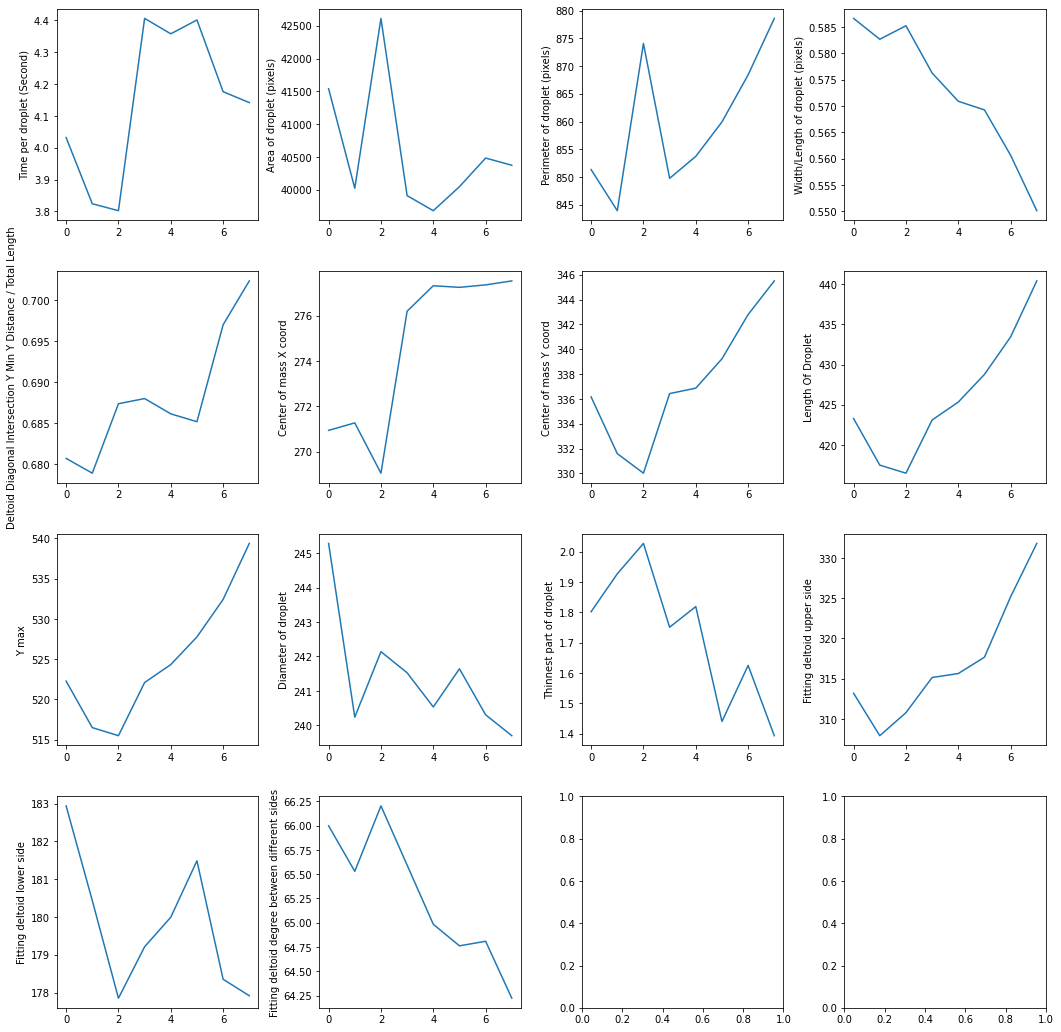

In [6]:
nrow=4
ncol=4

fig, axes = plt.subplots(nrow, ncol, figsize=(15, 15))
fig.tight_layout(pad=3.0)

count=0
for r in range(nrow):
    for c in range(ncol):
        if count < 14:
            compare_mean.iloc[count].plot(ax=axes[r,c], ylabel=compare_mean.index[count])
        count+=1

In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np

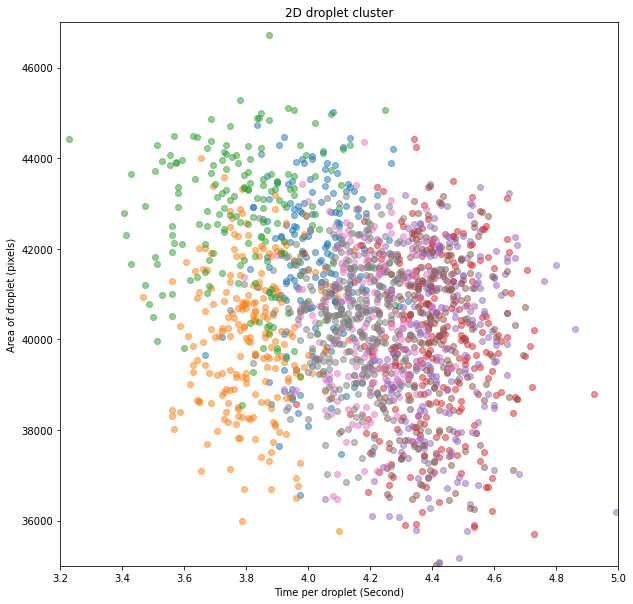

In [8]:
scatter_2d_data = []
for oil_data in oil_datas:
    arr = oil_data['single_all'][['Time per droplet (Second)', 'Area of droplet (pixels)']].to_numpy()
    # scaler = StandardScaler()
    # arr = scaler.fit_transform(arr)
    # print(arr.shape)
    scatter_2d_data.append(arr)

plt.figure(figsize=(10, 10))
for i, data in enumerate(scatter_2d_data):
    plt.scatter(data[:,0], data[:,1], alpha=0.5, label=str(i))
plt.xlim(3.2, 5.0)
plt.ylim(35000, 47000)
plt.title('2D droplet cluster')
plt.xlabel('Time per droplet (Second)')
plt.ylabel('Area of droplet (pixels)')
plt.show()

In [9]:
scatter_3d_data = []
for oil_data in oil_datas:
    # arr = oil_data['single_all'][['Time per droplet (Second)', 'Area of droplet (pixels)', 'Width/Length of droplet (pixels)']].to_numpy()
    arr = oil_data['single_all'][['Y max', 'Fitting deltoid upper side', 'Width/Length of droplet (pixels)']].to_numpy()
    # scaler = StandardScaler()
    # arr = scaler.fit_transform(arr)
    print(arr.shape)
    scatter_3d_data.append(arr)

(182, 3)
(233, 3)
(182, 3)
(269, 3)
(282, 3)
(200, 3)
(184, 3)
(295, 3)


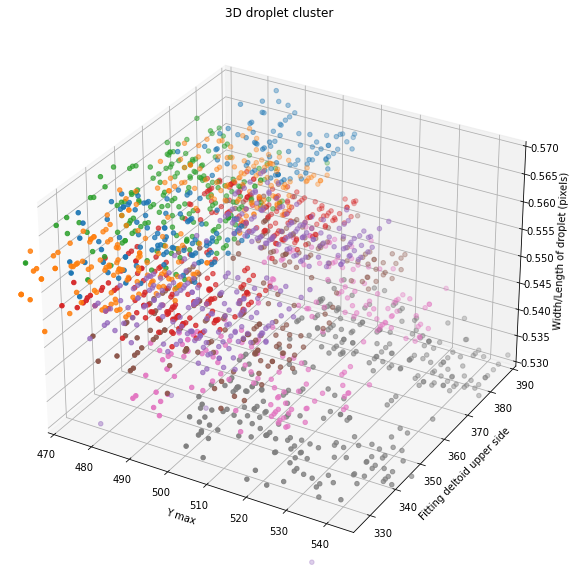

In [10]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(projection='3d')
for data in scatter_3d_data:
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], marker='o')
ax.axes.set_xlim3d(left=470, right=545)
ax.axes.set_ylim3d(bottom=325, top=390)
ax.axes.set_zlim3d(bottom=0.53, top=0.57)
ax.set_xlabel('Y max')
ax.set_ylabel('Fitting deltoid upper side')
ax.set_zlabel('Width/Length of droplet (pixels)')
plt.title('3D droplet cluster')
plt.show()

In [11]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [12]:
datasets_dfs = []
for oil_data in oil_datas:
    df = oil_data['single_all']
    df['viscosity'] = oil_data['v']
    datasets_dfs.append(df)  


In [ ]:
#from fast_ml.model_development import train_valid_test_split

#X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(datasets_dfs[1], target = 'viscosity', 
                                              #                              train_size=0.8, valid_size=0.1, test_size=0.1)

#print(X_train.shape), print(y_train.shape)
#print(X_valid.shape), print(y_valid.shape)
#print(X_test.shape), print(y_test.shape)


In [13]:
def split_train_valid_test(X, y):
    X_erm, X_test, y_erm, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_valid, y_train, y_valid = train_test_split(X_erm, y_erm, test_size=0.30, random_state=50)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [15]:
def split_data_together():
    datasets = pd.concat(datasets_dfs, axis=0).values
    min_max_scaler = preprocessing.MinMaxScaler()
    X = min_max_scaler.fit_transform(datasets[:,:-1])
    y = datasets[:, -1]
    print(f"X shape: ${X.shape}, Y shape: ${y.shape}")
    X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X, y)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [16]:
def split_data_separate():
    datasets_together = pd.concat(datasets_dfs, axis=0).values
    min_max_scaler = preprocessing.StandardScaler() # StandardScaler() or MinMaxScaler() can be picked: 
    min_max_scaler.fit(datasets_together[:,:-1])
    splits = ([], [], [], [], [], []) #X_train, X_valid, X_test, y_train, y_valid, y_test
    for df in datasets_dfs:
        np_arr = df.values
        X = min_max_scaler.transform(np_arr[:,:-1])
        y = np_arr[:, -1]
        _splits = split_train_valid_test(X, y)
        for index, _split in enumerate(_splits):
            splits[index].append(_split)
    # return map(np.vstack, splits)
    return np.vstack(splits[0]), np.vstack(splits[1]), np.vstack(splits[2]),\
           np.hstack(splits[3]), np.hstack(splits[4]), np.hstack(splits[5]),

[ 35.82831084  61.26768616  72.66198435  81.92500565  89.67760271
  95.14403516  98.14711634  99.16942548  99.68938132  99.96782183
  99.99622919  99.99868999 100.         100.        ]


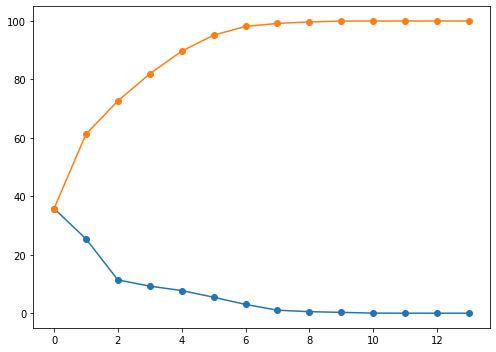

In [17]:
from sklearn.decomposition import PCA 
datasets_together = pd.concat(datasets_dfs, axis=0).values
pca = PCA()
scaled = StandardScaler().fit_transform(datasets_together[:,:-1])
# Fit the spectral data and extract the explained variance ratio
X1 = pca.fit(scaled)
expl_var_1 = X1.explained_variance_ratio_
print(np.cumsum(expl_var_1)*100)
# Plot data
with plt.style.context(()):
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
    fig.set_tight_layout(True)
    ax1.plot(expl_var_1*100,'-o',label="Explained Variance %")
    ax1.plot(np.cumsum(expl_var_1)*100,'-o', label = 'Cumulative variance %')



In [18]:
#X_train, X_valid, X_test, y_train, y_valid, y_test = split_data_together()
X_train, X_valid, X_test, y_train, y_valid, y_test = split_data_separate()
print(f"X_train shape: {X_train.shape}, X_valid shape: {X_valid.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape},y_valid shape: {y_valid.shape}, y_test shape: {y_test.shape}")

X_train shape: (1018, 14), X_valid shape: (441, 14), X_test shape: (368, 14)
y_train shape: (1018,),y_valid shape: (441,), y_test shape: (368,)


In [19]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)


In [20]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=14))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                150       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 8)                 88        
                                                                 
Total params: 458
Trainable params: 458
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))

Epoch 1/200
32/32 [==============================] - 1s 9ms/step - loss: 2.1094 - accuracy: 0.1582 - val_loss: 2.0752 - val_accuracy: 0.1542
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 2.0553 - accuracy: 0.1670 - val_loss: 2.0333 - val_accuracy: 0.1995
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 2.0158 - accuracy: 0.1984 - val_loss: 1.9867 - val_accuracy: 0.2404
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 1.9415 - accuracy: 0.2878 - val_loss: 1.8793 - val_accuracy: 0.3469
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 1.7761 - accuracy: 0.3694 - val_loss: 1.7332 - val_accuracy: 0.3878
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 1.6173 - accuracy: 0.4077 - val_loss: 1.6075 - val_accuracy: 0.4263
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 1.4842 - accuracy: 0.4283 - val_loss: 1.4861 - val_accuracy: 0.4399
Epoch 8/200
3

Epoch 59/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2109 - accuracy: 0.9263 - val_loss: 0.4999 - val_accuracy: 0.8662
Epoch 60/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9244 - val_loss: 0.4856 - val_accuracy: 0.8889
Epoch 61/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.9352 - val_loss: 0.4965 - val_accuracy: 0.8889
Epoch 62/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9342 - val_loss: 0.4934 - val_accuracy: 0.8866
Epoch 63/200
32/32 [==============================] - 0s 4ms/step - loss: 0.2045 - accuracy: 0.9263 - val_loss: 0.5037 - val_accuracy: 0.8889
Epoch 64/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1974 - accuracy: 0.9312 - val_loss: 0.5102 - val_accuracy: 0.8753
Epoch 65/200
32/32 [==============================] - 0s 4ms/step - loss: 0.1987 - accuracy: 0.9342 - val_loss: 0.4902 - val_accuracy: 0.8821
Epoch 

32/32 [==============================] - 0s 3ms/step - loss: 0.1299 - accuracy: 0.9519 - val_loss: 0.5332 - val_accuracy: 0.9138
Epoch 117/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 0.9578 - val_loss: 0.5379 - val_accuracy: 0.9070
Epoch 118/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1282 - accuracy: 0.9538 - val_loss: 0.5387 - val_accuracy: 0.9093
Epoch 119/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1269 - accuracy: 0.9558 - val_loss: 0.5522 - val_accuracy: 0.9025
Epoch 120/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1272 - accuracy: 0.9548 - val_loss: 0.5529 - val_accuracy: 0.9002
Epoch 121/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1257 - accuracy: 0.9548 - val_loss: 0.5450 - val_accuracy: 0.9070
Epoch 122/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1257 - accuracy: 0.9578 - val_loss: 0.5543 - val_accuracy: 0.9025
Epoch 123/200

32/32 [==============================] - 0s 4ms/step - loss: 0.0934 - accuracy: 0.9705 - val_loss: 0.5890 - val_accuracy: 0.9138
Epoch 174/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0974 - accuracy: 0.9656 - val_loss: 0.6171 - val_accuracy: 0.9093
Epoch 175/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0937 - accuracy: 0.9725 - val_loss: 0.6024 - val_accuracy: 0.9070
Epoch 176/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0925 - accuracy: 0.9666 - val_loss: 0.5983 - val_accuracy: 0.9048
Epoch 177/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0937 - accuracy: 0.9705 - val_loss: 0.5997 - val_accuracy: 0.9093
Epoch 178/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0928 - accuracy: 0.9686 - val_loss: 0.6017 - val_accuracy: 0.9138
Epoch 179/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0925 - accuracy: 0.9676 - val_loss: 0.6016 - val_accuracy: 0.9116
Epoch 180/200

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


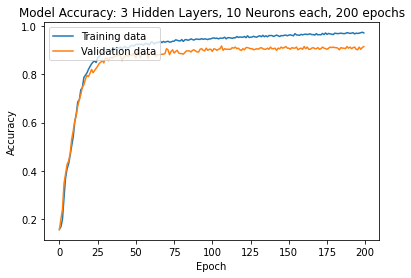

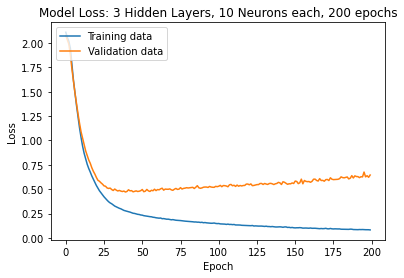

In [22]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy: 3 Hidden Layers, 10 Neurons each, 200 epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss: 3 Hidden Layers, 10 Neurons each, 200 epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='upper left')
plt.show()

In [23]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_valid= model.predict(X_valid)
scores1 = model.evaluate(X_valid, y_valid, verbose=0)
print('Accuracy on validation data: {}% \n Error on validation data: {}'.format(scores1[1], 1 - scores1[1]))

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

32/32 [==============================] - 0s 1ms/step
Accuracy on training data: 0.974459707736969% 
 Error on training data: 0.025540292263031006
14/14 [==============================] - 0s 1ms/step
Accuracy on validation data: 0.9160997867584229% 
 Error on validation data: 0.08390021324157715
12/12 [==============================] - 0s 1ms/step
Accuracy on test data: 0.926630437374115% 
 Error on test data: 0.07336956262588501


In [24]:

y_true=np.argmax(y_test, axis=-1)

y_pred=np.argmax(pred_test, axis=-1)
accurateprediction=0
for i in range(368):
    if (y_true[i]==y_pred[i]):
        accurateprediction+=1
    
print("The number of accurate predictions is:",accurateprediction)    
print(accurateprediction/368)

import matplotlib.pyplot as plt


The number of accurate predictions is: 341
0.9266304347826086


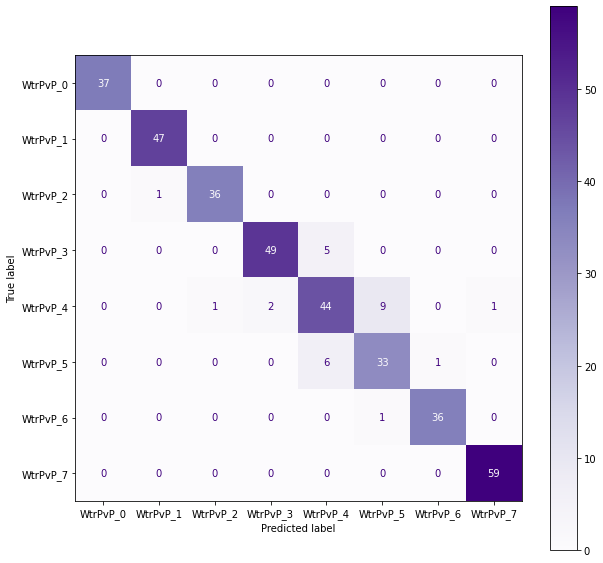

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_true, y_pred)

labels = ["WtrPvP_0", "WtrPvP_1", "WtrPvP_2","WtrPvP_3", "WtrPvP_4", "WtrPvP_5","WtrPvP_6","WtrPvP_7"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap=plt.cm.Purples,ax=ax)

plt.show()

In [30]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical

# Assuming X_train, X_valid, X_test, y_train, y_valid, y_test are defined
# Convert y_train, y_valid, and y_test to categorical if they're not already
# y_train_categorical = to_categorical(y_train)
# y_valid_categorical = to_categorical(y_valid)
# y_test_categorical = to_categorical(y_test)

# Combine X_train and X_valid, y_train_categorical and y_valid_categorical for cross-validation
X_combined = np.concatenate((X_train, X_valid), axis=0)
y_combined = np.concatenate((y_train, y_valid), axis=0)

# Define the number of folds
num_folds = 5
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores for each fold
cv_scores = []

# Iterate over the folds
for fold, (train_index, valid_index) in enumerate(kf.split(X_combined, np.argmax(y_combined, axis=1))):
    print(f"\nFold {fold + 1}/{num_folds}")

    # Split the data into training and validation sets for this fold
    X_train_fold, X_valid_fold = X_combined[train_index], X_combined[valid_index]
    y_train_fold, y_valid_fold = y_combined[train_index], y_combined[valid_index]

    # Create a new model for each fold
    model = Sequential()
    model.add(Dense(10, activation='relu', input_dim=14))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(8, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_fold, y_train_fold, epochs=200, validation_data=(X_valid_fold, y_valid_fold), verbose=0)

    # Evaluate the model on the validation set for this fold
    y_pred = model.predict(X_valid_fold)
    accuracy = accuracy_score(np.argmax(y_valid_fold, axis=1), np.argmax(y_pred, axis=1))
    print(f"Validation Accuracy: {accuracy}")

    # Store the accuracy for this fold
    cv_scores.append(accuracy)

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(cv_scores)
print(f"\nMean Cross-Validation Accuracy: {mean_accuracy}")



Fold 1/5
10/10 [==============================] - 0s 1ms/step
Validation Accuracy: 0.9006849315068494

Fold 2/5
10/10 [==============================] - 0s 1ms/step
Validation Accuracy: 0.934931506849315

Fold 3/5
10/10 [==============================] - 0s 1ms/step
Validation Accuracy: 0.9452054794520548

Fold 4/5
10/10 [==============================] - 0s 1ms/step
Validation Accuracy: 0.9383561643835616

Fold 5/5
10/10 [==============================] - 0s 1ms/step
Validation Accuracy: 0.9209621993127147

Mean Cross-Validation Accuracy: 0.9280280563008991


In [37]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score


# Combine X_train and X_valid, y_train, and y_valid for cross-validation
X_combined = np.concatenate((X_train, X_valid), axis=0)
y_combined = np.concatenate((y_train, y_valid), axis=0)

# Create a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1)

# Wrap the classifier with MultiOutputClassifier for handling multilabel problems
svm_model = MultiOutputClassifier(svm_classifier)

# Use cross_val_score for cross-validation
cv_scores = cross_val_score(svm_model, X_combined, y_combined, cv=5)  # You can adjust the number of folds

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.64383562 0.11986301 0.13356164 0.83219178 0.36769759]
Mean Cross-Validation Accuracy: 0.41942992985924776
